In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('/content/십이지장 췌액 공유 시트 - GI.csv', skiprows=2)
df=df.drop(0, axis=0)

In [14]:
import datetime

In [31]:
df_drop=df[df['채취시간'].notnull()]
df_drop_2 = df_drop.drop(df_drop[df_drop['채취시간'] == '중도탈락'].index)

In [53]:
df_drop_2.shape

(71, 33)

In [54]:
def convert_to_minutes(time_str):
  """Converts a string in the format 'x분y초' to minutes.

  Args:
    time_str: The time string in the format 'x분y초'.

  Returns:
    The time in minutes as a float.
  """
  if isinstance(time_str, str): # Check if the input is a string
    try:
      minutes, seconds = time_str.split('분')
      total_minutes = int(minutes) + int(seconds.rstrip('초')) / 60
      return total_minutes
    except ValueError:
      # Handle cases with missing minutes or seconds
      return minutes # or any other default value
  else:
    return 0 # Return 0 for non-string inputs

df_drop_2['채취시간_분'] = df_drop_2['채취시간'].apply(convert_to_minutes)

In [63]:
df_drop_2['채취시간_분'].tail(30)

,채취시간_분
47,10
49,5
50,10
51,5
52,5
53,5
54,5
55,5
56,5
59,11


In [64]:
df_drop_2.columns

Index(['naïve papilla', '검체 성공\n (대조&\n 췌장암)', '등록번호', '성명',
       '검체 성공\n(군별 성공 \n개수 확인)', 'ICF no', 'Subject no.',
       'CA19-9\n (Baseline)\n', '췌장암 \n 병기_미정 \n(stage)',
       '췌장암 \n 병기_확정\n(stage)', '대조군\n기존  질환명', '췌장질환\n구분', '이니셜',
       '샘플 \n채취 일자', '채취시간', '채취 \n용량 [cc]', '분주 후 \n용량 [cc]',
       '1st centri [cc]', '실험일자 ', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       '실험 후 남은 ml', '폐기일자', '폐기 ml', '실험 항목', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', '200ul 십이지장 체액 유래 exosomal microRNA농도(in 20ul DEPC)',
       '십이지장 체액 색깔', '비고', '채취시간_분'],
      dtype='object')

In [77]:
df=df_drop_2

In [78]:
df['채취속도_ml/min'] = df['채취 \n용량 [cc]'].astype(float) / df['채취시간_분'].astype(float) # Convert elements to float to handle potential decimals

In [79]:
df['채취속도_ml/min'].head(10)

,채취속도_ml/min
1,1.333333
2,0.100000
3,0.090909
4,0.077778
5,0.135294
6,0.600000
7,0.200000
8,0.160000
9,0.136000
10,0.110000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


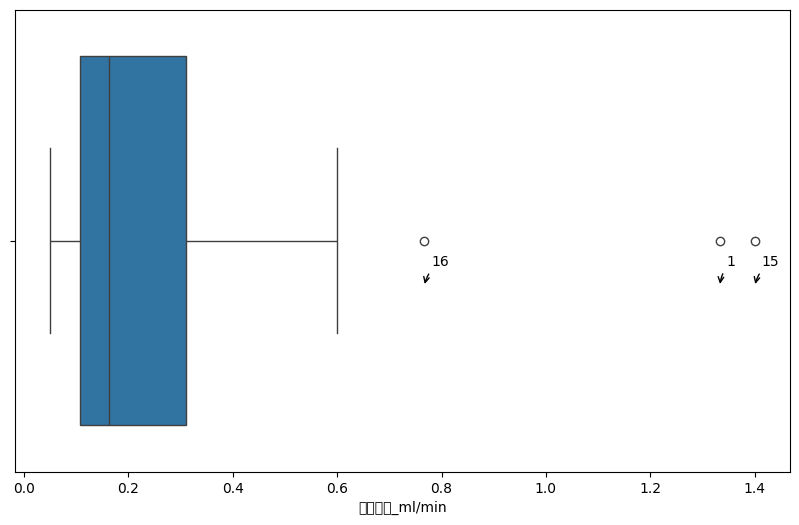

<Figure size 640x480 with 0 Axes>

In [86]:
# Calculate the quartiles and IQR
Q1 = df['채취속도_ml/min'].quantile(0.25)
Q3 = df['채취속도_ml/min'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['채취속도_ml/min'] < lower_bound) | (df['채취속도_ml/min'] > upper_bound)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='채취속도_ml/min')

# Annotate outliers with their index
for i in outliers.index:
    plt.annotate(i, (outliers['채취속도_ml/min'].loc[i], 0.1),
                 xytext=(5, 15), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

plt.show()
plt.savefig('boxplot.jpg')

In [87]:
df.shape

(71, 35)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


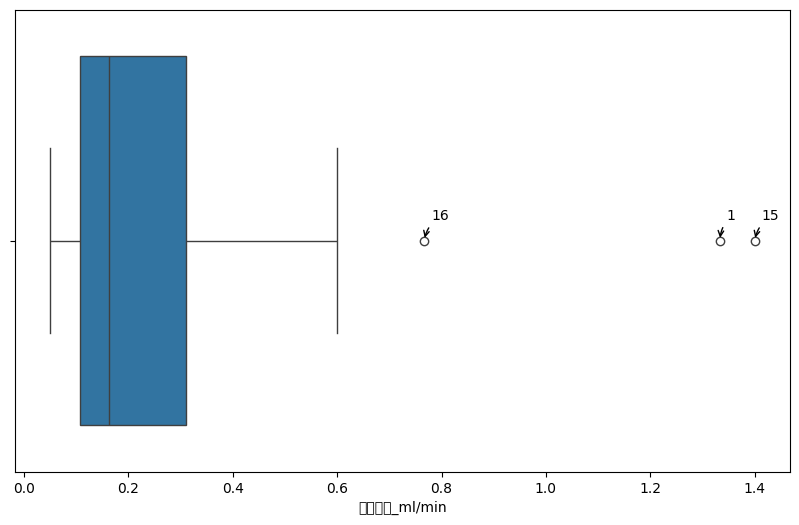

<Figure size 640x480 with 0 Axes>

In [88]:
# IQR 계산
Q1 = df['채취속도_ml/min'].quantile(0.25)
Q3 = df['채취속도_ml/min'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어를 찾기 위한 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 아웃라이어 추출
outliers = df[(df['채취속도_ml/min'] < lower_bound) | (df['채취속도_ml/min'] > upper_bound)]

# 박스플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='채취속도_ml/min')

# 아웃라이어에 주석 추가
for i in outliers.index:
    plt.annotate(i,
                 (outliers['채취속도_ml/min'].loc[i], 0),  # 아웃라이어 위치에 주석
                 xytext=(5, 15), textcoords='offset points',  # 주석의 위치 조정
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

# 플롯을 화면에 표시하고 저장
plt.show()
plt.savefig('boxplot.jpg')

In [89]:
# IQR 계산
Q1 = df['채취속도_ml/min'].quantile(0.25)
Q3 = df['채취속도_ml/min'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어를 찾기 위한 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 아웃라이어 추출
outliers = df[(df['채취속도_ml/min'] < lower_bound) | (df['채취속도_ml/min'] > upper_bound)]

# 아웃라이어를 제외한 데이터프레임 생성
df_drop = df[~((df['채취속도_ml/min'] < lower_bound) | (df['채취속도_ml/min'] > upper_bound))]

# df_drop의 결과 확인
print(df_drop)

   naïve papilla 검체 성공\n (대조&\n 췌장암)      등록번호    성명 검체 성공\n(군별 성공 \n개수 확인)  \
2        naïve아님                   2  68237985   김원영                 대조군1st   
3          naïve                   3  68252674   진교종                 췌장암2nd   
4          naïve                   4  67848212   이상훈                 대조군2nd   
5          naïve                   5  67251483   노채연                 대조군3rd   
6          naïve                   6  68039491   제정운                 대조군4th   
..           ...                 ...       ...   ...                    ...   
76         naïve                  68  69589735   김종열                췌장암40th   
77         naïve                  69  69664131   남기호                췌장암41th   
78         naïve                  70  69655339   고춘석                췌장암42th   
79         naïve                  71  69625408  이승희                췌장암43th    
80         naïve                  72  69679582  정호영                 췌장암44th   

   ICF no Subject no. CA19-9\n (Baseline)\n 췌장암 \n 

<Axes: xlabel='채취속도_ml/min'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing fr

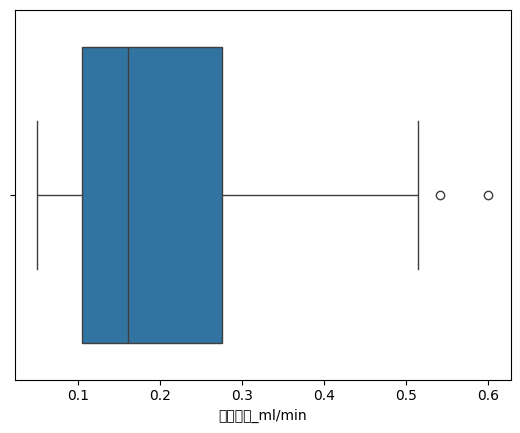

In [90]:
sns.boxplot(data=df_drop, x='채취속도_ml/min')

In [91]:
df_drop.shape

(68, 35)

<Axes: xlabel='채취속도_ml/min', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing fr

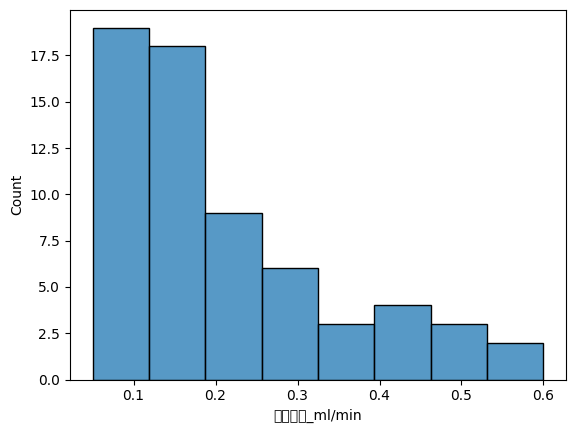

In [92]:
sns.histplot(data=df_drop, x='채취속도_ml/min')

TypeError: 'value' must be an instance of str or bytes, not a float

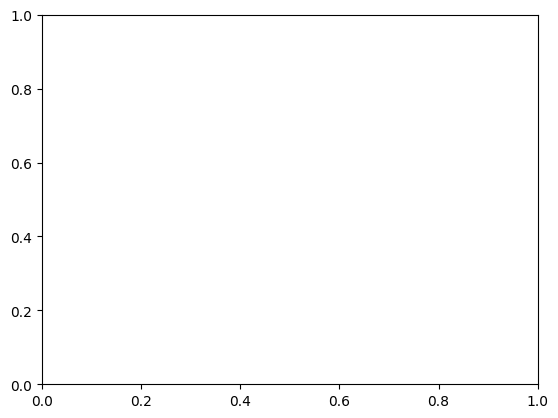

In [93]:
sns.scatterplot(data=df_drop, x='채취시간_분', y='분주 후 \n용량 [cc]')

<ipython-input-95-a90395dc8a5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['채취시간_분'] = df_drop['채취시간_분'].astype(str)
<ipython-input-95-a90395dc8a5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['분주 후 \n용량 [cc]'] = df_drop['분주 후 \n용량 [cc]'].astype(str)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

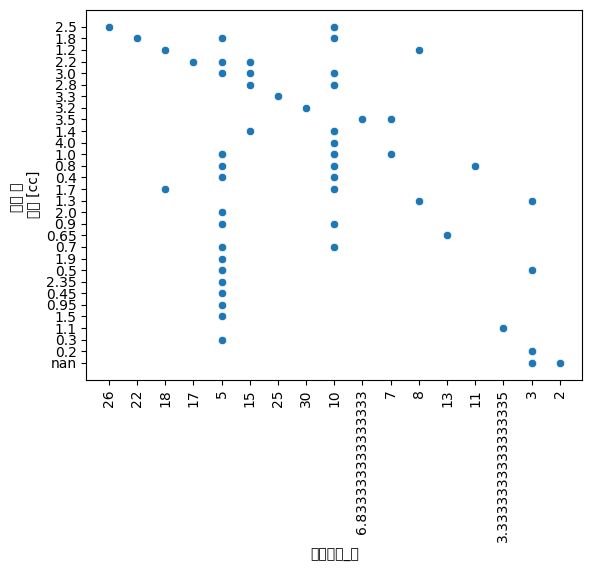

In [95]:
# Convert the problematic columns to string type
df_drop['채취시간_분'] = df_drop['채취시간_분'].astype(str)
df_drop['분주 후 \n용량 [cc]'] = df_drop['분주 후 \n용량 [cc]'].astype(str)

# Create the scatterplot
ax = sns.scatterplot(data=df_drop, x='채취시간_분', y='분주 후 \n용량 [cc]')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

<ipython-input-97-c67ea06ca083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['채취시간_분'] = pd.to_numeric(df_drop['채취시간_분'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist

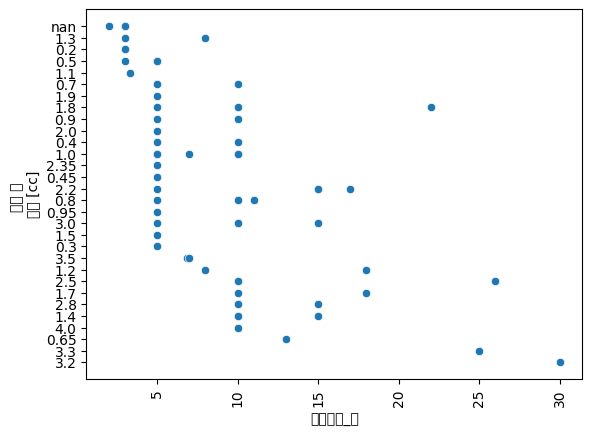

In [97]:
# '채취시간_분'을 float 타입으로 변환
df_drop['채취시간_분'] = pd.to_numeric(df_drop['채취시간_분'], errors='coerce')

# '채취시간_분'을 기준으로 오름차순 정렬
df_drop_sorted = df_drop.sort_values(by='채취시간_분')

# 정렬된 DataFrame으로 scatterplot 생성
ax = sns.scatterplot(data=df_drop_sorted, x='채취시간_분', y='분주 후 \n용량 [cc]')

# x축 레이블을 90도 회전
plt.xticks(rotation=90)

# 플롯을 표시
plt.show()

In [98]:
# df.drop 은 aberrant 값 제거한 것임.

<ipython-input-100-9fef6208b183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['채취월'] = pd.to_datetime(df_drop['샘플 \n채취 일자']).dt.month
<ipython-input-100-9fef6208b183>:18: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  plt.tight_layout()
<ipython-input-100-9fef6208b183>:18: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  plt.tight_layout()
<ipython-input-100-9fef6208b183>:18: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  plt.tight_layout()
<ipython-input-100-9fef6208b183>:18: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-100-9fef6208b183>:18: UserWarning: Glyph 50900 (\N{H

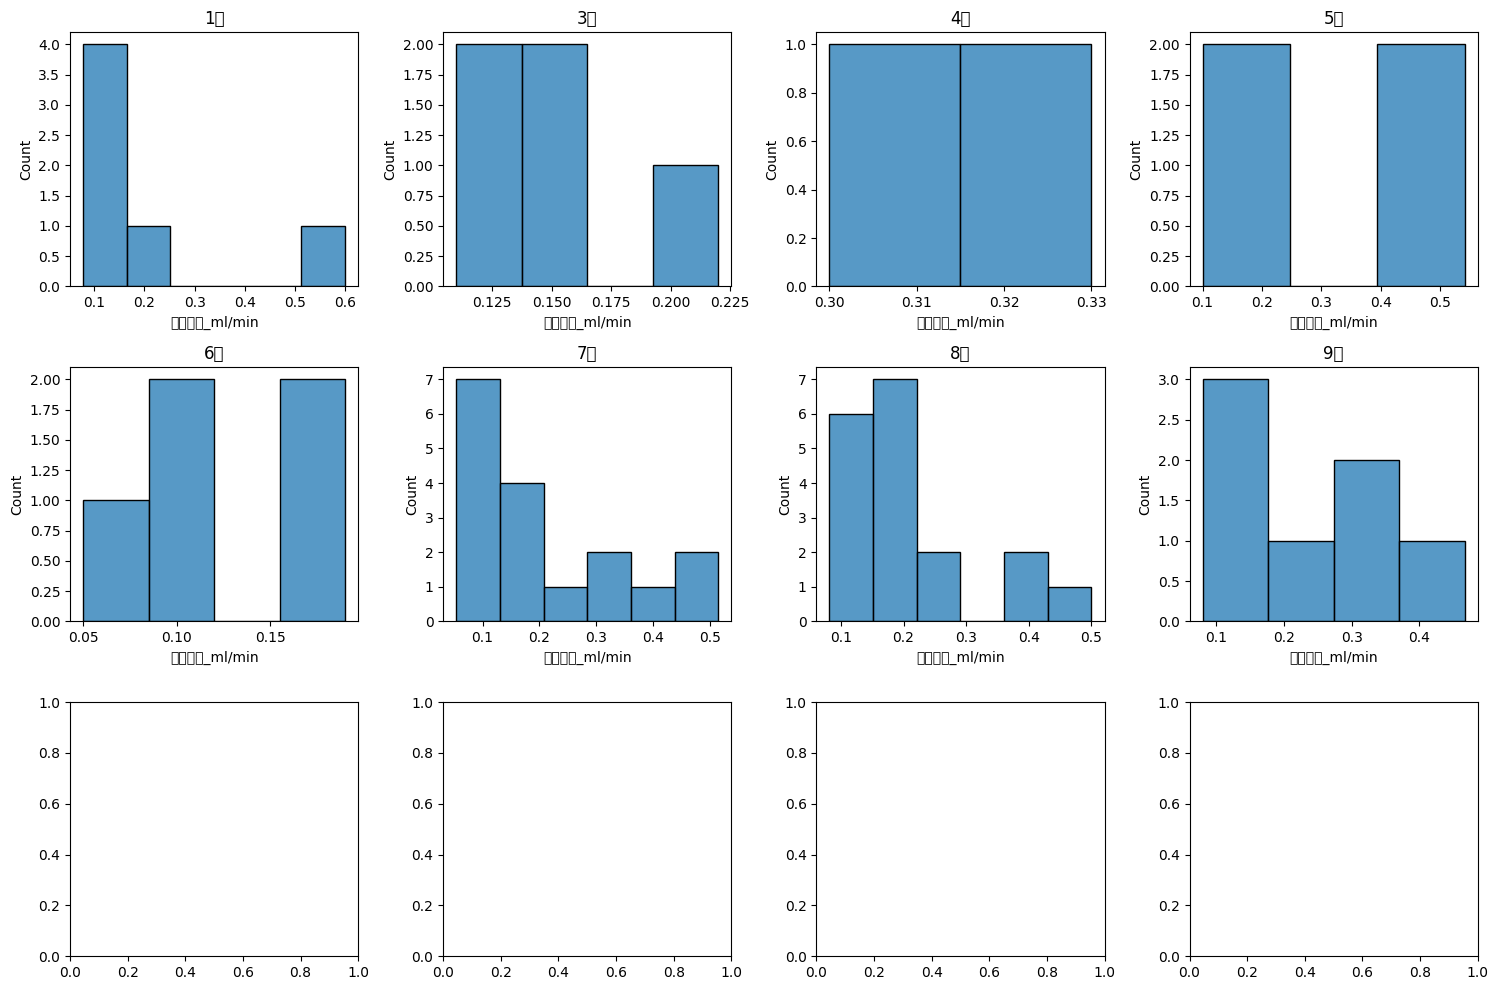

In [100]:
# '샘플채취일자'에서 월을 추출
df_drop['채취월'] = pd.to_datetime(df_drop['샘플 \n채취 일자']).dt.month

# 서브플롯을 위한 준비 (월별 데이터 개수가 많지 않으므로 최대 12개의 서브플롯 생성)
months = sorted(df_drop['채취월'].unique())
n_months = len(months)

# 서브플롯 설정 (최대 3행 4열)
fig, axes = plt.subplots(nrows=(n_months // 4) + 1, ncols=min(n_months, 4), figsize=(15, 10))

# 서브플롯에 각 월별 데이터 히스토그램 그리기
for i, month in enumerate(months):
    ax = axes[i // 4, i % 4]  # 서브플롯의 행과 열 선택
    sns.histplot(data=df_drop[df_drop['채취월'] == month], x='채취속도_ml/min', ax=ax)
    ax.set_title(f'{month}월')  # 각 서브플롯의 제목 설정

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [102]:
# '샘플채취일자'에서 월을 추출하여 '채취월' 열을 생성
df_drop['채취월'] = pd.to_datetime(df_drop['샘플 \n채취 일자']).dt.month

# 월별로 '채취속도_ml/min'에 대한 요약 통계 계산
monthly_stats = df_drop.groupby('채취월')['채취속도_ml/min'].describe()

# 결과 출력
print(monthly_stats)

     count      mean       std       min       25%       50%       75%  \
채취월                                                                      
1      6.0  0.200663  0.200511  0.077778  0.093182  0.117647  0.183824   
3      5.0  0.154533  0.040940  0.110000  0.136000  0.146667  0.160000   
4      2.0  0.315000  0.021213  0.300000  0.307500  0.315000  0.322500   
5      4.0  0.302866  0.212267  0.100000  0.137500  0.285000  0.450366   
6      5.0  0.121429  0.054930  0.050000  0.090000  0.120000  0.157143   
7     17.0  0.208893  0.141982  0.053846  0.105556  0.162500  0.290000   
8     18.0  0.211212  0.115683  0.081818  0.120000  0.190000  0.257500   
9      7.0  0.232381  0.151752  0.080000  0.100000  0.200000  0.340000   

          max  
채취월            
1    0.600000  
3    0.220000  
4    0.330000  
5    0.541463  
6    0.190000  
7    0.514286  
8    0.500000  
9    0.466667  


<ipython-input-102-80914d2edc26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['채취월'] = pd.to_datetime(df_drop['샘플 \n채취 일자']).dt.month


In [107]:
df_6789 = df_drop[df_drop['채취월'].isin([6, 7, 8, 9])]
# df_6789는 6월~9월 데이터만 따로 모은 것

In [108]:
df_6789.columns

Index(['naïve papilla', '검체 성공\n (대조&\n 췌장암)', '등록번호', '성명',
       '검체 성공\n(군별 성공 \n개수 확인)', 'ICF no', 'Subject no.',
       'CA19-9\n (Baseline)\n', '췌장암 \n 병기_미정 \n(stage)',
       '췌장암 \n 병기_확정\n(stage)', '대조군\n기존  질환명', '췌장질환\n구분', '이니셜',
       '샘플 \n채취 일자', '채취시간', '채취 \n용량 [cc]', '분주 후 \n용량 [cc]',
       '1st centri [cc]', '실험일자 ', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       '실험 후 남은 ml', '폐기일자', '폐기 ml', '실험 항목', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', '200ul 십이지장 체액 유래 exosomal microRNA농도(in 20ul DEPC)',
       '십이지장 체액 색깔', '비고', '채취시간_분', '채취속도', '채취속도_ml/min', '채취월'],
      dtype='object')

TypeError: can't multiply sequence by non-int of type 'float'

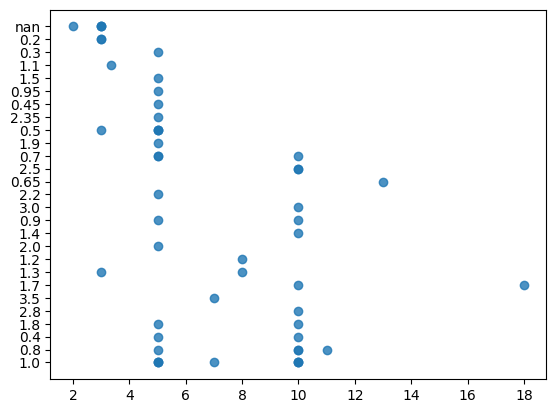

In [110]:
sns.regplot(x='채취시간_분', y='분주 후 \n용량 [cc]', data=df_6789)
plt.show()

<ipython-input-111-4852dc22c966>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6789['채취시간_분'] = pd.to_numeric(df_6789['채취시간_분'], errors='coerce')
<ipython-input-111-4852dc22c966>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6789['분주 후 \n용량 [cc]'] = pd.to_numeric(df_6789['분주 후 \n용량 [cc]'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


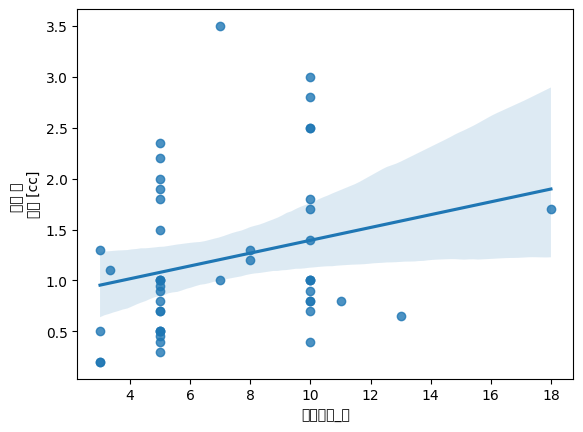

In [111]:
# Convert the columns to numeric type. Errors='coerce' will replace invalid parsing with NaN
df_6789['채취시간_분'] = pd.to_numeric(df_6789['채취시간_분'], errors='coerce')
df_6789['분주 후 \n용량 [cc]'] = pd.to_numeric(df_6789['분주 후 \n용량 [cc]'], errors='coerce')

# Create the regression plot
sns.regplot(x='채취시간_분', y='분주 후 \n용량 [cc]', data=df_6789)
plt.show()

In [117]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.stattools import durbin_watson

# Use df_6789 which has been cleaned and converted to numeric
X = df_6789['채취시간_분']  # 독립 변수
y = df_6789['분주 후 \n용량 [cc]']  # 종속 변수

# Check for missing values and drop rows with NaN
df_clean = df_6789.dropna(subset=['채취시간_분', '분주 후 \n용량 [cc]'])

# Check for constant variance
if df_clean['채취시간_분'].nunique() <= 1:
    print("Independent variable is constant. Cannot calculate Durbin-Watson.")
else:
    X = df_clean['채취시간_분']
    y = df_clean['분주 후 \n용량 [cc]']

    # 상수항 추가 (Intercept)
    X = sm.add_constant(X)

    # OLS 모델 적합
    model = sm.OLS(y, X).fit()

    # 잔차 계산
    residuals = model.resid

    # Durbin-Watson 통계량 계산
    dw = durbin_watson(residuals)

    # 결과 출력
    print(f'Durbin-Watson 통계량: {dw}')

Durbin-Watson 통계량: 1.9089361982688835


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


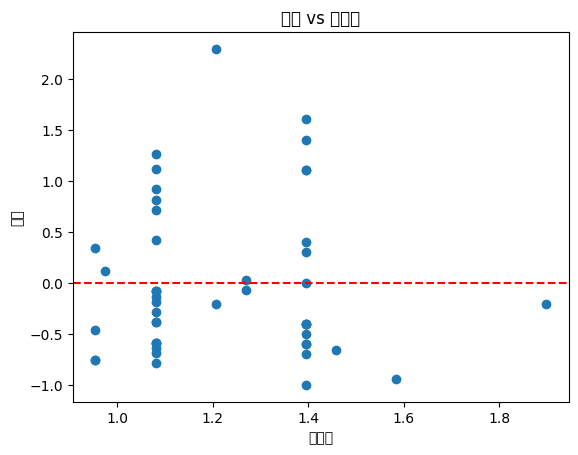

In [118]:
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 vs 예측값')
plt.show()

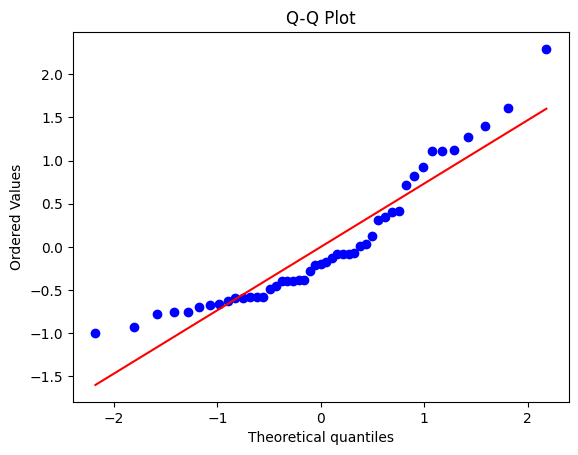

In [119]:
import scipy.stats as stats

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [120]:
# 독립변수와 종속변수 설정
X = df_clean['채취시간_분']  # 독립 변수
y = df_clean['분주 후 \n용량 [cc]']  # 종속 변수

# 상수항 추가 (Intercept)
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

# 잔차 계산
residuals = model.resid

# Durbin-Watson 통계량 계산
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)

# 결과 출력
print(f'Durbin-Watson 통계량: {dw}')

                            OLS Regression Results                            
Dep. Variable:          분주 후 
용량 [cc]   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.161
Date:                Fri, 20 Sep 2024   Prob (F-statistic):             0.0822
Time:                        04:13:21   Log-Likelihood:                -53.020
No. Observations:                  47   AIC:                             110.0
Df Residuals:                      45   BIC:                             113.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7653      0.277      2.759      0.0

In [121]:
0.5/0.0629

7.94912559618442

In [127]:
#calculate CUSUM

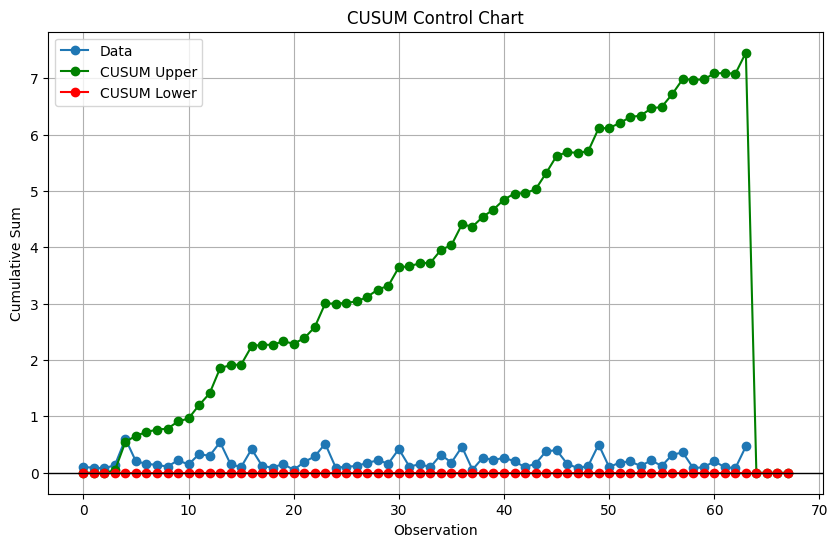

In [132]:
# Set the target (mean value)
target = 0.2/7.9

# Initialize CUSUM arrays for upper and lower CUSUMs
cusum_pos = np.zeros(len(df_drop['채취속도_ml/min']))  # Positive CUSUM (Upper)
cusum_neg = np.zeros(len(df_drop['채취속도_ml/min']))  # Negative CUSUM (Lower)

# Define the threshold
K = 0.13562601238647637/2  # Sensitivity factor, often set to half the standard deviation of the data
# Access the values in the '채취속도_ml/min' column
values = df_drop['채취속도_ml/min'].values

# Loop through data to calculate CUSUM values
for i in range(1, len(values)):
    cusum_pos[i] = max(0, cusum_pos[i-1] + values[i] - (target + K))  # Upper CUSUM
    cusum_neg[i] = max(0, cusum_neg[i-1] + (target - K) - values[i])  # Lower CUSUM

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(values, label='Data', marker='o')
plt.plot(cusum_pos, label='CUSUM Upper', marker='o', color='green')
plt.plot(cusum_neg, label='CUSUM Lower', marker='o', color='red')

# Add labels and title
plt.title('CUSUM Control Chart')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum')
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.grid(True)
plt.show()

In [131]:
# Calculate the standard deviation of the '채취속도_ml/min' column
std_dev = df_drop['채취속도_ml/min'].std()

# Print the result
print(f"Standard deviation of 채취속도_ml/min: {std_dev}")

Standard deviation of 채취속도_ml/min: 0.13562601238647637
